In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Data/HousingInventory_EDA.csv')

C:\Users\robin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,RE,mail_city,mail_state,mail_zipcode,subdivision_name,neighborhood,perc_capped,just_value,perc_school_deduction,perc_county_deduction,...,city,zipcode,RE_b,sec_township_range,inv_group,mailing_address,site_address,bldng_proportion,adj_just_value,owner_type
0,000006 0030,JACKSONVILLE,FL,32234,SECTION LAND,417300.2,1.0,228683,-0.1093,-0.2186,...,JACKSONVILLE,32234,000006 0030 1,1 2S 23E,NaN,2503 SUMMERFIELD LN,2503 SUMMERFIELD LN,1.0,228683,PRIMARY RESIDENCE
1,000007 0010,JACKSONVILLE,FL,32257,SECTION LAND,417300.2,0.0,75449,0.0000,0.0000,...,JACKSONVILLE,32234,000007 0010 1,1 2S 23E,NaN,9540 SAN JOSE BLVD,2610 N US 301 HWY,1.0,75449,SECONDARY RESIDENCE
2,000009 0100,BALDWIN,FL,32234,SECTION LAND,417300.2,1.0,193391,-0.3320,-0.4612,...,JACKSONVILLE,32234,000009 0100 1,12 2S 23E,NaN,2495 US 301 HWY N,2495 N US 301 HWY,1.0,193391,PRIMARY RESIDENCE
3,000011 0000,BALDWIN,FL,32234,SECTION LAND,417300.2,0.0,95301,0.0000,0.0000,...,JACKSONVILLE,32234,000011 0000 1,12 2S 23E,NaN,2425 US HWY 301 N,2435 N US 301 HWY,1.0,95301,SECONDARY RESIDENCE
4,000012 0010,JACKSONVILLE,FL,32234,SECTION LAND,417300.2,1.0,121447,-0.3491,-0.5550,...,JACKSONVILLE,32234,000012 0010 1,12 2S 23E,NaN,2204 US HWY 301 N,2204 N US 301 HWY,1.0,121447,PRIMARY RESIDENCE


In [4]:
df.shape

(252717, 87)

In [5]:
df = df.drop(columns=[
    'mail_city', 'mail_state', 'mail_zipcode', 'building', 'actual_yr_built', 'effec_yr_built',
    'owner', 'city', 'RE_b', 'sec_township_range', 'inv_group', 
    'mailing_address', 'site_address', 'owner_type', 'subdivision_name', 'neighborhood',
    'adj_just_value', 'bldng_proportion'
    ])
df.shape

(252717, 69)

In [6]:
hsf = df[['RE','heated_sf']].groupby('RE').sum().reset_index()['heated_sf'].to_list()
len(hsf)
gsf = df[['RE','gross_sf']].groupby('RE').sum().reset_index()['gross_sf'].to_list()
len(hsf)
esf = df[['RE','effec_sf']].groupby('RE').sum().reset_index()['effec_sf'].to_list()
len(hsf)

251301

In [7]:
homes = df[['RE','just_value']].groupby('RE').count().reset_index()['just_value'].to_list()
len(homes)

251301

In [8]:
df.drop(columns=['heated_sf','gross_sf','effec_sf'], inplace=True)

In [9]:
df2 = df.groupby('RE', axis=0).mean()

In [10]:
df.drop_duplicates(subset='RE', inplace=True)
df = df[['RE','type_descr', 'tax_district']]
df = df.merge(df2, on='RE', how='left')
df['heated_sf'] = hsf
df['gross_sf'] = gsf
df['effec_sf'] = esf
df['home_count'] = homes
df['zipcode'] = df.zipcode.astype('int').astype('category')

In [11]:
df = pd.get_dummies(df, columns=['zipcode'], prefix='z')
df = pd.get_dummies(df, columns=['tax_district'], prefix='td')
df = pd.get_dummies(df, columns=['type_descr'], prefix='type')

In [12]:
df.shape

(251301, 147)

In [13]:
df2 = pd.read_csv("D:/Data/HomeSales.csv")
df2.head()

,RE,sale_id,seller,sale_date,price,building,actual_yr_built,heated_sf,age_at_sale,neighborhood,zipcode,address
0,017964 0000,1,NaN,1985-09-20,40500,1,1962,1075,23,412602.26,32210.0,6529 HUGH CT
1,112600 0000,6,NaN,2006-11-30,185000,1,1963,1644,43,214701.26,32277.0,5560 MAXINE DR
2,167759 7350,4,REGIONS MORTGAGE,2002-07-10,274000,1,1999,3186,3,314411.28,32256.0,8714 E HAMPTON LANDING DR
3,140237 0000,2,NaN,1988-07-18,77500,1,1961,1924,27,215801.23,32216.0,1340 GROVE PARK BLVD
4,010427 1020,6,POTEET MATTHEW D STEPHANIE J,2006-03-03,179000,1,1986,1533,20,412602.32,32210.0,7213 MIMOSA GROVE TRL


In [14]:
df2 = df2[['RE', 'sale_id', 'sale_date', 'price', 'age_at_sale']]
df2['sale_date'] = pd.to_datetime(df2['sale_date'])
df2 = df2[df2['sale_date']>='2010']
df2.shape

(90620, 5)

In [15]:
df2 = df2.merge(df,how='left',on='RE')
df2.drop(columns='RE', inplace=True)

In [16]:
df2.head()

,sale_id,sale_date,price,age_at_sale,perc_capped,just_value,perc_school_deduction,perc_county_deduction,lot_sf,class,...,td_USD2B,td_USD3,td_USD4,td_USD5,type_SFR 1 STORY,type_SFR 2 STORY,type_SFR 3 STORY,type_SFR CLASS 2,type_SFR CLASS 3,type_SFR SPLIT-LEVEL
0,3,2018-12-06,222700,1,1.0,196871.0,-0.1784,-0.3054,14895.0,4.0,...,0,0,0,0,1,0,0,0,0,0
1,4,2013-05-24,113300,28,1.0,198744.0,-0.4929,-0.6187,6330.0,3.0,...,0,0,0,0,1,0,0,0,0,0
2,6,2011-12-12,232000,13,1.0,256148.0,-0.0976,-0.1952,7200.0,4.0,...,0,0,0,0,0,0,0,0,0,1
3,8,2010-01-04,136900,1,1.0,137512.0,-0.3927,-0.5745,19022.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,6,2010-01-04,144900,10,1.0,197691.0,-0.5234,-0.6499,6767.0,4.0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
import math
df2['class'] = [math.ceil(x) for x in df2['class']]
df2['class'] = df2['class'].astype('category')
df2['quality'] = [math.ceil(x) for x in df2['quality']]
df2['quality'] = df2['quality'].astype('category')

In [18]:
df2.drop(columns=['sale_id', 'parcel_bldng_sf', 'sale_date'], inplace=True)
df2['just_value'] = df2.just_value.astype('int64')
df2['lot_sf'] = df2.lot_sf.astype('int64')
df2['age'] = df2.age.astype('int64')
df2['effec_age'] = df2.effec_age.astype('int64')
df2['building_value'] = df2.building_value.astype('int64')
df2['bldng_count'] = df2.bldng_count.astype('int64')
df2['land_value'] = df2.land_value.astype('int64')
df2['feature_count'] = df2.feature_count.astype('int64')
df2['features_value'] = df2.features_value.astype('int64')
df2['sub_ft_count'] = df2.sub_ft_count.astype('int64')
df2['gross_sf'] = df2.gross_sf.astype('int64')
df2['effec_sf'] = df2.effec_sf.astype('int64')
df2['land_use_count'] = df2.land_use_count.astype('int64')

In [19]:
col_list = pd.Series([x if x[:2] in['d_','z_','td'] else None for x in df2.columns]).dropna().to_list()
col_list2 = pd.Series([x if x[:3]=='ft_' else None for x in df2.columns]).dropna().to_list()
col_list3 = pd.Series([x if x[:4]=='sub_' else None for x in df2.columns]).dropna().to_list()
col_list4 = pd.Series([x if x[:5]=='land_' else None for x in df2.columns]).dropna().to_list()
col_list = col_list + col_list2 + col_list3 + col_list4
col_list.remove('land_value')
col_list.remove('land_use_count')
col_list.remove('sub_ft_count')
for col in col_list:
    df2[col] = df2[col].astype('category')
df2.dropna(inplace=True)
df2.shape

(90620, 147)

In [20]:
features = df2.columns.to_list()
features.remove('price')

X = df2[features]

y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.9329010121173322

In [21]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[0.86393649 0.94262758 0.95194507 0.95934607 0.92196303]


C:\Users\robin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105106175381102.23, tolerance: 344781645182.3307
  model = cd_fast.enet_coordinate_descent(


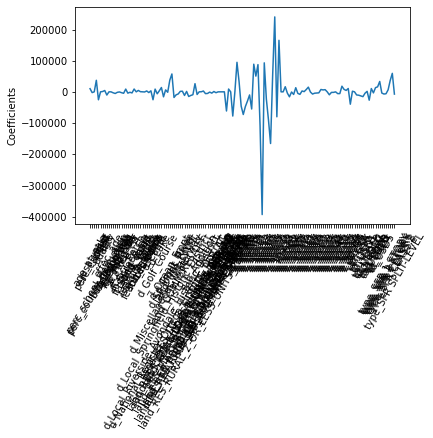

In [23]:
from sklearn.linear_model import Lasso
names = df2.drop('price', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [ ]:
features = list(df.columns).remove('price')

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = df2[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:

entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 10)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
#tree.plot_tree(entr_model)
entr_model

In [ ]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())